<a href="https://colab.research.google.com/github/SaiArjunSairamje/Probability-and-Stats/blob/main/Prob%20%26%20Stats%20(Personal%20Notes)%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# <center>**Descriptive Statistics**</center>
***

In [ ]:
'''
Descriptive Statistics (Content):
--------------------------------------
* Intro to Statistics: Descriptive Statistics & Inferencial Statistics
* Measures of central tendency (mean, median, mode, weighted average)
  (NOTE: Why Median better than Mean ??? "Median is more robest to outliers")
  Q) There are 4 people whose average age is 24. We know the age of three people: 20, 22, and 28. What is the median age of these 4 people?
  Q) In a survey about favourite animal, 30 people said cat, 40 people said dog, 20 people said cow. Wha is the mode of favourite animals in this data?
  Q) The mean weight of 2 children in a family is 40 Kgs. If the weight of the mother is included, the mean becomes 45. What is the weight of the mother?
  Q) A survey of number of pets in a town saw that 30% people had 0 pets, 40% had 1 pet, 10% had 2 pets, 20% had 3 pets. What is the average number of pets?

* Measure of dispersion
	- Range (i.e. spread of data), variance, and standard deviation
	- Percentiles and quartiles
	- Interquartile range (IQR)
* Data visualization (Box plots)
	- Percentiles, Min, Max
	- IQR (i.e. range b/w 25th & 75th percentiles)
* Calculating Percentiles (25th, 50th (Median), 75th) & Quartiles (Q1, Q2, Q3)
  For Percentiles:
    Approach (1):
	- np.percentile(data[], 25) --> 25th percentile or Q1 quartile
	- np.percentile(data[], 50) --> 50th percentile or Q2 quartile or medium
	- np.percentile(data[], 75) --> 75th percentile or Q3 quartile
    Approach (2):
	- data[].quantile(0.25) -->  Q1 quartile or 25th percentile
	- data[].quantile(0.50) -->  Q2 quartile or 50th percentile or medium
	- data[].quantile(0.75) -->  Q3 quartile or 75th percentile
  For IQR (Interquartile Range):
	- (np.percentile(data[], 75) - np.percentile(data[], 75)) --> (75th percentile - 25th percentile)
* Creating Data visualization (Box plots) for Percentiles & Quartiles
	- sns.boxplot(data = data[], orient = "h")
* Calculating max (i.e. upper) & min (i.e. lower) points
	- upper_bound = min(actual_max, 75_percentile + 1.5*IQR)
	- lower_bound = max(0, 25_percentile - 1.5*IQR)
* How much % of data is above the upper_bound (i.e. outliers)???
	- data_outlier = data[data[] > upper_bound]
	  len(data_outlier)
	  (above_output/count_value_from_describe_function)*100

(NOTE: Using a different dataset)
* Cumulative Distribution Function (CDF) (Connecting CDF to percentiles and cumulative probabilities in dataset)
  Approach (1): Manual code
	- x_values = np.linspace(min_height, max_height, 1000)  --> creating x_axis (NOTE: similar to np.arange())
	  y_values = []
	  for x in x_values:
	  	people_shorter_than_x = df_height[df_height <= x]
    		num_people_shorter_than_x = len(people_shorter_than_x)
		frac_people_shorter_than_x = num_people_shorter_than_x / total
		y_values.append(frac_people_shorter_than_x)
		plt.plot(x_values, y_values)
  Approach (2): Pre-defined library
	- from statsmodels.distributions.empirical_distribution import ECDF  #Expirical CDF
	  e = ECDF(data)
	  plt.plot(e.x, e.y, c = "r")
* Data visualization (Histogram Plot) for Distribution of the data points
	- sns.histplot(data[])
* Measures of dispersion (variance, standard deviation, range)
	- formula for Variance
	- formula for Standard Deviation
'''

In [3]:
sehwag = pd.read_csv("sehwag.csv")
dravid = pd.read_csv("dravid.csv")

In [4]:
sehwag.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13
0,1,5,2,0,0,50.00,7,lbw,1,NaN,v Pakistan,Mohali,1 Apr 1999,ODI # 1427
1,19,18,24,0,1,79.16,6,caught,1,NaN,v Zimbabwe,Rajkot,14 Dec 2000,ODI # 1660
2,58,62,54,8,0,107.40,6,bowled,1,NaN,v Australia,Bengaluru,25 Mar 2001,ODI # 1696
3,2,7,7,0,0,28.57,6,caught,2,NaN,v Zimbabwe,Bulawayo,27 Jun 2001,ODI # 1730
4,11,19,16,1,0,68.75,6,not out,2,NaN,v West Indies,Bulawayo,30 Jun 2001,ODI # 1731


In [5]:
dravid.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13
0,3,-,4,0,0,75.00,4,caught,1,NaN,v Sri Lanka,Singapore,3 Apr 1996,ODI # 1089
1,4,-,7,0,0,57.14,4,run out,1,NaN,v Pakistan,Singapore,5 Apr 1996,ODI # 1091
2,3,-,5,0,0,60.00,5,caught,2,NaN,v Pakistan,Sharjah,12 Apr 1996,ODI # 1094
3,11,28,21,0,0,52.38,8,caught,2,NaN,v South Africa,Sharjah,14 Apr 1996,ODI # 1097
4,22,21,15,3,0,146.66,6,not out,1,NaN,v England,Manchester,26 May 1996,ODI # 1104


## **(1) Let's handle sehwag.csv first**

In [6]:
sehwag.shape

(245, 14)

In [7]:
sehwag.describe()

,Runs,BF,4s,6s,SR,Pos,Inns,Unnamed: 9
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.00000,245.000000,0.0
mean,33.767347,32.363265,4.620408,0.555102,93.085755,1.82449,1.530612,NaN
std,34.809419,29.175744,4.583335,1.124442,46.830716,1.24376,0.500084,NaN
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000,1.000000,NaN
25%,8.000000,10.000000,1.000000,0.000000,65.850000,1.00000,1.000000,NaN
50%,23.000000,25.000000,3.000000,0.000000,92.230000,1.00000,2.000000,NaN
75%,46.000000,42.000000,7.000000,1.000000,123.800000,2.00000,2.000000,NaN
max,219.000000,149.000000,25.000000,7.000000,260.000000,8.00000,2.000000,NaN


In [8]:
sehwag["Runs"].describe()

count    245.000000
mean      33.767347
std       34.809419
min        0.000000
25%        8.000000
50%       23.000000
75%       46.000000
max      219.000000
Name: Runs, dtype: float64

### **Calculating Percentiles (25th, 50th (Median), 75th) / Quartiles (Q1, Q2, Q3)**

In [9]:
# Approach (1)

In [10]:
perc_25 = np.percentile(sehwag["Runs"], 25)
perc_25

8.0

In [11]:
perc_50 = np.percentile(sehwag["Runs"], 50)
perc_50

23.0

In [12]:
perc_75 = np.percentile(sehwag["Runs"], 75)
perc_75

46.0

In [13]:
# Approach (2)

In [14]:
p_25 = sehwag["Runs"].quantile(0.25)      # Q1 or p_25
p_50 = sehwag["Runs"].quantile(0.5)       # Q2 or p_50 or median
p_75 = sehwag["Runs"].quantile(0.75)      # Q3 or p_75
print(p_25, p_50, p_75)

8.0 23.0 46.0


### **Calculating IQR (Interquartile Range)**

In [15]:
iqr = p_75 - p_25
iqr

38.0

### **Creating Data visualization (Box plots) for Percentiles & Quartiles**

<Axes: >

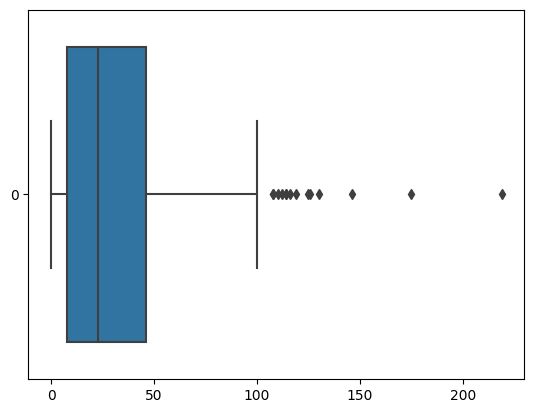

In [16]:
sns.boxplot(data = sehwag["Runs"], orient = "h")

### **Calculating the max (i.e. upper boundary) & min (i.e. lower boundary) points**

- upper_bound = min(actual_max, 75_percentile + 1.5*IQR)
- lower_bound = max(0, 25_percentile - 1.5*IQR)

In [17]:
lower = max(0, p_25 - 1.5*iqr)
lower

0

In [18]:
upper = p_75 + 1.5 * iqr      # easier code since we know the 75% percentile
upper

103.0

In [19]:
upper2 = min(max(sehwag["Runs"]), p_75 + 1.5 * iqr)
upper2

103.0

In [20]:
print(f"lower: {lower} \nupper: {upper}")

lower: 0 
upper: 103.0


### **Calculating the % of data which is above the upper_bound (i.e. outliers)**


In [21]:
sehwag_outlier = sehwag[sehwag['Runs'] > upper]      # Masking

In [22]:
len(sehwag_outlier)       # Number of Outliers

14

In [23]:
(14/245)*100          # % of Outliers

5.714285714285714

## **(2) Now let's handle dravid.csv `(NOTE: Same code steps as previous)`**

In [24]:
dravid.shape

(318, 14)

In [25]:
dravid["Runs"].describe()

count    318.000000
mean      34.242138
std       29.681822
min        0.000000
25%       10.000000
50%       26.000000
75%       54.000000
max      153.000000
Name: Runs, dtype: float64

**Calculating Percentiles (25th, 50th (Median), 75th) / Quartiles (Q1, Q2, Q3)**

In [26]:
p_25 = np.percentile(dravid["Runs"], 25)
p_25

10.0

In [27]:
p_50 = np.percentile(dravid["Runs"], 50)
p_50

26.0

In [28]:
p_75 = np.percentile(dravid["Runs"], 75)
p_75

54.0

**Calculating IQR (Interquartile Range)**

In [29]:
iqr = p_75 - p_25
iqr

44.0

**Creating Data visualization (Box plots) for Percentiles & Quartiles**

<Axes: >

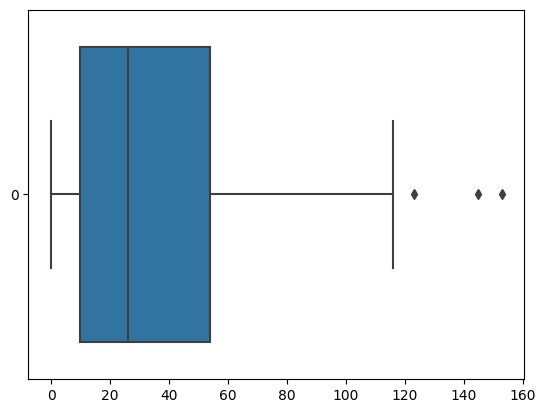

In [30]:
sns.boxplot(data = dravid["Runs"], orient = "h")

**Calculating the max (i.e. upper boundary) & min (i.e. lower boundary) points**

In [31]:
lower = max(0, p_25 - 1.5 * iqr)
lower

0

In [32]:
upper = p_75 + 1.5 * iqr
upper

120.0

In [33]:
print(f"lower: {lower}, \nupper: {upper}")

lower: 0, 
upper: 120.0


**Calculating the % of data which is above the upper_bound (i.e. outliers)**

In [34]:
dravid_outlier = dravid[dravid['Runs'] > upper]      # Masking

In [35]:
len(dravid_outlier)       # Number of outliers

3

In [36]:
(3 / 318) * 100       # % of Outliers

0.9433962264150944

## **(3) Let's work on weight-height.csv**

In [37]:
df_hw = pd.read_csv("weight-height.csv")
df_hw

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [38]:
df_hw["Height"].describe()    # inch

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [39]:
df_height = df_hw["Height"]

In [40]:
min_height = df_height.min()

In [41]:
max_height = df_height.max()

In [42]:
print(min_height, max_height)

54.2631333250971 78.9987423463896


In [43]:
total = len(df_height)
total

10000

### **Cumulative Distribution Function (CDF)**

Cumulative Distribution Function (CDF) `(Connecting CDF to percentiles and cumulative probabilities in dataset)`

> **`Approach (1):` Manual code**

> **`Approach (2):` from statsmodels.distributions.empirical_distribution import ECDF `(i.e. Empirical CDF)`**

In [44]:
# Approach (1)

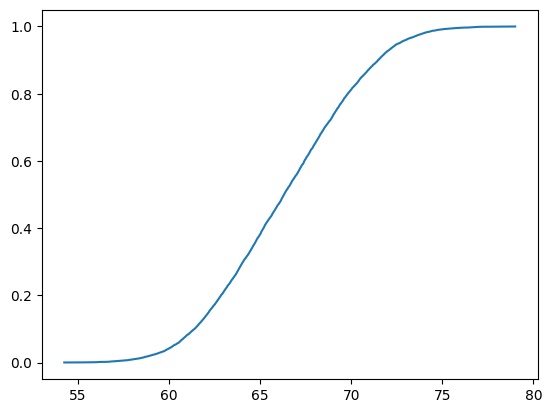

In [45]:
x_values = np.linspace(min_height, max_height, 1000)
y_values = []

for x in x_values:
    people_shorter_than_x = df_height[df_height <= x]

    num_people_shorter_than_x = len(people_shorter_than_x)

    frac_people_shorter_than_x = num_people_shorter_than_x / total

    y_values.append(frac_people_shorter_than_x)

plt.plot(x_values, y_values)

In [46]:
# Approach (2)

In [47]:
from statsmodels.distributions.empirical_distribution import ECDF       # Empirical CDF

In [48]:
e = ECDF(df_height)

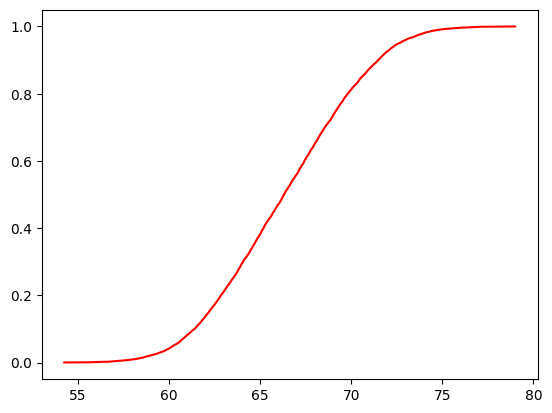

In [49]:
plt.plot(e.x, e.y, c = "r")

In [50]:
df_height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

### **Data visualization (Histogram Plot) for Distribution of the data points**

<Axes: xlabel='Height', ylabel='Count'>

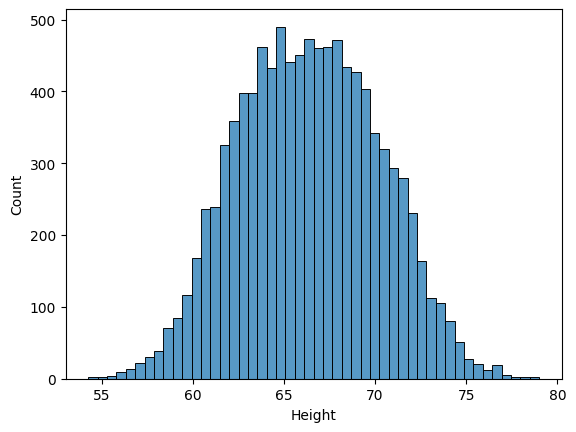

In [51]:
sns.histplot(df_height)       # Data visualization (Histogram Plot) for Distribution of the data points

# <center>**Gaussian distribution**</center>
***

In [ ]:
'''
Gaussian Distribution (Content):
--------------------------------------
> 68/95/99 Rule (Emperical Rule)
> Z-Score Table Vs Python Library (SciPy)
> Computing Prob
> Actual example

* 68/95/99 Rule (Emperical Rule)
	- 68% of the data falls within 1 standard deviation of the mean (μ ± σ) in a normal distribution
	- 95% of the data falls within 2 standard deviations of the mean (μ ± 2σ) in a normal distribution
	- 99.7% of the data falls within 3 standard deviations of the mean (μ ± 3σ) in a normal distribution
  Q) The height of people is Gaussian with mean 65 inches and standard deviation 2.5 inches.
	Q1) If I randomly meet one of these people, what is the probability their height is between 60 and 62.5 inches?
 	Q2) What fraction of people are shorter than 67.5?
	Q3) What is the fraction of people whose height is between 60 and 72.5?

* IMP: CDF and Percentile (a.k.a. Fraction) are inverse of each other
  The CDF gives the cumulative probability up to a specific value, while percentiles provide the value below which a specified percentage of data falls. These two concepts complement each other and are essential in understanding and analyzing data distributions.
	- CDF --> Given the x-axis (input value), you can find the y-axis value (i.e. cumulative probability (a.k.a. fraction)) using CDF
	- Percentile (a.k.a. Fraction) --> Given the y-axis (i.e. cumulative probability (a.k.a. fraction)), you can find the x-axis value using percentiles

* NOTE: There are 2 types of handling Gaussian Distribution queries:
	(1) Using 68/95/97 rule as shown previously
	(2) General approach (i.e. under "Calculating Probabilities and Percentiles" topic)
		- when the questions is based on "shorter/lesser than"
		- when the questions is based on "between range"

* Computing Probabilities (i.e. y-axis) and Percentiles (i.e. x-axis)
  General approach to find fraction (i.e. percentage) given x-axis input value. That is, CDF: "given height --> tell me the fraction"
  Step (1)-Q) Given a person with hight 69.1 inch, how much standard deviation away it is from from the mean?
		- 69.1 = 65 + (z)2.5
	  	  z = (69.1 - 65) / 2.5
	  	  z = 1.64
		  That is,
	  	  z = (height - mean) / standard_deviation
  Step (2)-Q) What fraction of people are shorter than 69.1 inch?
		- Approach (1): Z-Score table (Link: https://www.z-table.com/)
		- Approach (2): Python Scipy library

  Q) What fraction of people have height less than 70.8 inch?
  Step (1): Z Score Calculation
	 	70.8 = 65 + (z)2.5
	  	z = (70.8 - 65) / 2.5
	  	z = 2.32
  Step (2):
	- Approach (1) --> Z-Score table
	  	Z-Score Table = 0.9898
	- Approach (2) --> Python Scipy
		from scipy.stats import norm
		z = (x_value - mean)/std   #Z Score Calculation
		norm.cdf(z)	# Alternative to Z-Score Table

  Q) Balls produced by manufacturer have mean 50 mm and std dev 2 mm. What fraction of balls are smaller than 53 mm?	(Ans: 0.93)

* Deriving the Emperical Rule (68/95/99 Rule)
  NOTE: norm.cdf() --> gives o/p based on questions asked in "shorter/lesser than"
	norm.cdf() - norm.cdf() --> gives o/p based on questions asked in "between range"
  Fraction of people having hegith between 1 standard deviation from the mean
	- norm.cdf(1)  #z = (67.5 - 65)/2.5 = 2.5/2.5 = 1
	  norm.cdf(-1)  #z = (62.5 - 65)/2.5 = -2.5/2.5 = -1
	  norm.cdf(1) - norm.cdf(-1)  #give o/p 0.68268...
  Fraction of people having hegith between 2 standard deviation from the mean
	- norm.cdf(2) - norm.cdf(-2)  #give o/p 0.9544...
  Fraction of people having hegith between 3 standard deviation from the mean
	- norm.cdf(3) - norm.cdf(-3)  #give o/p 0.9973...

* Computing Probabilities (i.e. y-axis) and Percentiles (i.e. x-axis)-(Revised)
  General approach to find x-axis (i.e. percentage) given y-axis value (i.e. fraction). That is, Percentile: "given fraction --> tell percentage"
  Q) The height of people is Gaussian with mean 65 inches and standard deviation 2.5 inches. One person says: 96% people are shorter than me. What is my height?
  	Step (1): z = norm.ppf(y_value)  #PPF (Probability Point Function) is the inverse of the CDF that gives the Z-Score value
  	Step (2): height = mean + (z * std)	#NOTE: this is how we started first previously as "z = (x_value - meanu) / std" so reversing back to same process

* Actual example
  Sample (Q) Skaters take a mean of 7.42 seconds and std dev of 0.34 seconds for 500 meters. What should his speed be such that he is faster than 95% of his competitors?
  Case Study: Inventory Manager - Analyse sales data and choose an optimum inventory.
	Q1) A retail outlet sells around 1000 toothpastes a week, with std dev = 200. If the on-hand inventory is 1300, what is the need for replenishment within the week?
  	Q2) We want at most 3% of times to be out of stock. What should be my inventory?
'''

### **(1) Z-Score Table Vs Python Library (SciPy)**

[Z-Score Table](https://www.z-table.com/)

In [53]:
from scipy.stats import norm

**The height of people is Gaussian with mean (μ) 65 inches and standard deviation (𝜎) 2.5 inches**

In [59]:
# Q. Fraction of people are shorter than 69.1
z = (69.1 - 65)/2.5
z

1.6399999999999977

In [56]:
norm.cdf(z)     # alternative to z-table --> gives the fraction of people shorter/lesser than given H: 69.1

0.949497416525896

In [58]:
# Q. Fraction of people are shorter than 70.8
z = (70.8 - 65) / 2.5
norm.cdf(z)

0.9898295613312803

**Balls produced by manufacturer have mean (μ) 50 mm and std dev (𝜎) 2 mm. What fraction of balls are smaller than 53 mm?**

In [62]:
z = (53 - 50) / 2
norm.cdf(z)

0.9331927987311419

### **(2) Empirical Rule (68/95/99)**

> **`NOTE:`** The **norm.cdf(z)** provides only the **lower than the given value based o/p percentage**. In order to obtain o/p based on **between than values**, we will be using the **Empirical Rule based idea**.

In [63]:
# Q. Fraction are shorter than 67.5
z = (67.5 - 65) / 2.5
norm.cdf(z)

0.8413447460685429

In [ ]:
'''
That is, see the breakdown below which is same o/p as above cell:
z = (67.5 - 65) / 2.5
z = 2.5 / 2.5
z = 1
norm.cdf(z)
'''

In [74]:
norm.cdf(1)     # Same o/p as above cell o/p

0.8413447460685429

In [64]:
# Q. Fraction are shorter than 62.5
z = (62.5 - 65) / 2.5
norm.cdf(z)

0.15865525393145707

In [ ]:
'''
That is, see the breakdown below which is same o/p as above cell:
z = (62.5 - 65) / 2.5
z = -2.5 / 2.5
z = -1
norm.cdf(z)
'''

In [76]:
norm.cdf(-1)      # Same o/p as above cell o/p

0.15865525393145707

In [77]:
# Q. Fraction of people having height within 1 standard deviation from the mean (i.e. between 62.5 and 67.5)
norm.cdf(1) - norm.cdf(-1)

0.6826894921370859

In [78]:
# Q. Fraction of people having height within 2 standard deviation from the mean (i.e. between 60 and 70)
norm.cdf(2) - norm.cdf(-2)

0.9544997361036416

In [79]:
# Q. Fraction of people having height within 3 standard deviation from the mean (i.e. between 57.5 and 72.5)
norm.cdf(3) - norm.cdf(-3)

0.9973002039367398

### **(3) Inverse of CDF (Cumulative Distribution Function)**

> **CDF** --> Given **x-value**, provide the **y-value** (a.k.a. **fraction**) **o/p**     

> **Inverse of CDF** --> Given **y-value** (a.k.a. **fraction**), provide the **x-value o/p**

**The height of people is Gaussian with mean 65 inches and standard deviation 2.5 inches One person says: 96% people are shorter than me. What is my height?**

**Percentile**

In [81]:
# norm.ppf() full form is "Percent point function" which gives the "Z-Score" value and from that we can find the actual hight...
z = norm.ppf(0.96)
z

1.7506860712521692

In [82]:
height = 65 + z*2.5
height

69.37671517813042

In [ ]:
'''
Skaters take a mean of 7.42 seconds and std dev of 0.34 seconds for 500 meters.
What should his speed be such that he is faster than 95% of his competitors?
'''

In [87]:
'''
A retail outlet sells around 1000 toothpastes a week, with std dev = 200.
If the on-hand inventory is 1300, what is the need for replenishment within the week?
'''

'\nA retail outlet sells around 1000 toothpastes a week, with std dev = 200.\nIf the on-hand inventory is 1300, what is the need for replenishment within the week?\n'

In [ ]:
'''
Around 6% of the time the qty utilized will be more than 1300 -> there is a need to do replinesihment 6% of the times
we want at most 3% of times to be out of stock. What should be my inventory?
'''